In [31]:
import pandas as pd

df = pd.read_excel("Student Mental health.xlsx")

print(df.head())

print(df.shape)


             Timestamp Choose your gender   Age What is your course?  \
0  2020-08-07 12:02:00             Female  18.0          Engineering   
1  2020-08-07 12:04:00               Male  21.0    Islamic education   
2  2020-08-07 12:05:00               Male  19.0                  BIT   
3  2020-08-07 12:06:00             Female  22.0                 Laws   
4  2020-08-07 12:13:00               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                 

In [32]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("?", "", regex=False)
)

df.columns


Index(['timestamp', 'choose_your_gender', 'age', 'what_is_your_course',
       'your_current_year_of_study', 'what_is_your_cgpa', 'marital_status',
       'do_you_have_depression', 'do_you_have_anxiety',
       'do_you_have_panic_attack',
       'did_you_seek_any_specialist_for_a_treatment'],
      dtype='str')

In [33]:
df['do_you_have_depression']

0      Yes
1       No
2      Yes
3      Yes
4       No
      ... 
96      No
97     Yes
98     Yes
99      No
100     No
Name: do_you_have_depression, Length: 101, dtype: str

In [34]:
df.head(3)

,timestamp,choose_your_gender,age,what_is_your_course,your_current_year_of_study,what_is_your_cgpa,marital_status,do_you_have_depression,do_you_have_anxiety,do_you_have_panic_attack,did_you_seek_any_specialist_for_a_treatment
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-08-07 12:05:00,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

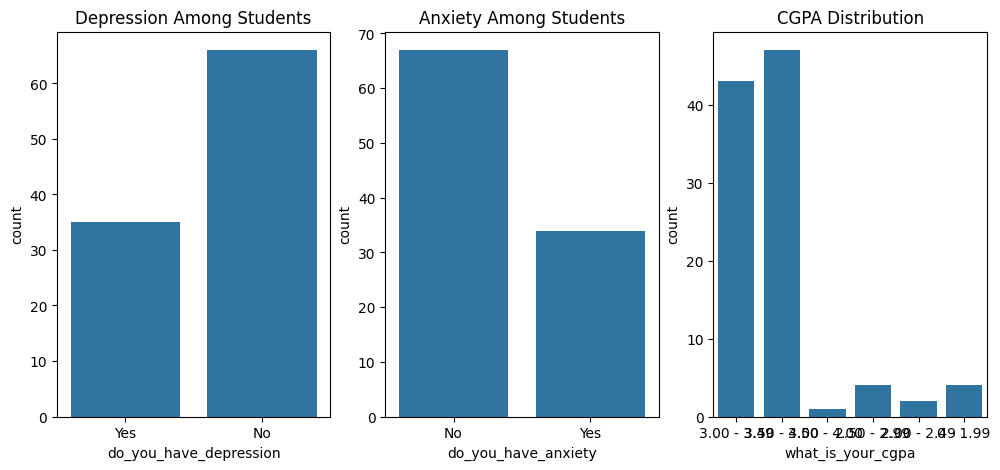

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.countplot(data=df, x='do_you_have_depression', ax=axes[0])
axes[0].set_title("Depression Among Students")

sns.countplot(data=df, x='do_you_have_anxiety', ax=axes[1])
axes[1].set_title("Anxiety Among Students")

sns.countplot(data=df, x='what_is_your_cgpa', ax=axes[2])
axes[2].set_title("CGPA Distribution")
plt.show()


In [38]:
df['what_is_your_cgpa'].value_counts()

what_is_your_cgpa
3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: count, dtype: int64

In [39]:
df['what_is_your_cgpa'].value_counts()

what_is_your_cgpa
3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: count, dtype: int64

In [40]:

#mapping out the cgpa to be inbetween, so its neither too high or too low.

cgpa_map = {
    '0 - 1.99': 1.5,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}


df['cgpa_numeric'] = df['what_is_your_cgpa'].map(cgpa_map)

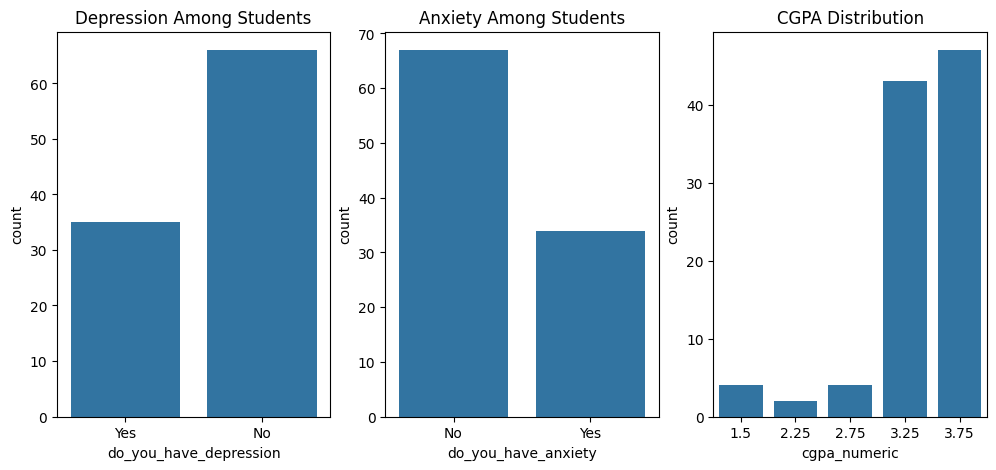

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.countplot(data=df, x='do_you_have_depression', ax=axes[0])
axes[0].set_title("Depression Among Students")

sns.countplot(data=df, x='do_you_have_anxiety', ax=axes[1])
axes[1].set_title("Anxiety Among Students")

sns.countplot(data=df, x='cgpa_numeric', ax=axes[2])
axes[2].set_title("CGPA Distribution")
plt.show()


In [42]:
df['year_numeric'] = (
    df['your_current_year_of_study']
    .astype(str)
    .str.extract(r'(\d)')
    .astype(int)
)


In [43]:
df.head()

,timestamp,choose_your_gender,age,what_is_your_course,your_current_year_of_study,what_is_your_cgpa,marital_status,do_you_have_depression,do_you_have_anxiety,do_you_have_panic_attack,did_you_seek_any_specialist_for_a_treatment,cgpa_numeric,year_numeric
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.25,1
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,3.25,2
2,2020-08-07 12:05:00,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3.25,1
3,2020-08-07 12:06:00,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,3.25,3
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,3.25,4


In [44]:

# 1) Define the function
def convert_cgpa_to_number(cgpa_range):
    if pd.isna(cgpa_range):
        return None

    cgpa_range = str(cgpa_range).strip()

    # Example: "3.00 - 3.49"
    parts = cgpa_range.split('-')
    lower = float(parts[0].strip())
    upper = float(parts[1].strip())

    return (lower + upper) / 2


# 2) Prove the function exists (debug)
print("Function exists?", "convert_cgpa_to_number" in globals())

# 3) Apply it
df['cgpa_numeric'] = df['what_is_your_cgpa'].apply(convert_cgpa_to_number)

# 4) Show result
print(df[['what_is_your_cgpa', 'cgpa_numeric']].head(10))


Function exists? True
  what_is_your_cgpa  cgpa_numeric
0       3.00 - 3.49         3.245
1       3.00 - 3.49         3.245
2       3.00 - 3.49         3.245
3       3.00 - 3.49         3.245
4       3.00 - 3.49         3.245
5       3.50 - 4.00         3.750
6      3.50 - 4.00          3.750
7       3.50 - 4.00         3.750
8       2.50 - 2.99         2.745
9       3.50 - 4.00         3.750


In [45]:
pressure_depression = (
    df.groupby('academic_pressure')['do_you_have_depression']
      .mean()
      .reset_index()
)

pressure_depression

KeyError: 'academic_pressure'

In [46]:
df['depressed_and_anxious'] = (
    (df['do_you_have_depression'] == 'Yes') &
    (df['do_you_have_anxiety'] == 'Yes')
).astype(int)

In [47]:
percentage_depressed_and_anxious = df['depressed_and_anxious'].mean() * 100

In [48]:
percentage

np.float64(17.82178217821782)

In [49]:
df['do_you_have_depression_num'] = (
    df['do_you_have_depression'] == 'Yes'
).astype(int)

percentage_depressed = df['do_you_have_depression_num'].mean() * 100
percentage_depressed

np.float64(34.65346534653465)

In [51]:
df['do_you_have_anxiety_num'] = (
    df['do_you_have_anxiety'] == 'Yes'
).astype(int)

do_you_have_anxiety_num = df['do_you_have_anxiety_num'].mean() * 100
do_you_have_anxiety_num

np.float64(33.663366336633665)